In [1]:
import pandas as pd # Dataframe and data viewing
import numpy as np # Mathematical operations (e.g. showing percventage score, rounding)
import seaborn as sns # Data visualisation
import matplotlib.pyplot as plt # Plotting, visualization
import csv # Loading data

# Keras, TensorFlow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Dense

# Sklearn metrics including r2 score
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics as mt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extra modules, mostly used for evaluation (performance, accuracy)
import time
import random

# These were used for installing necessary models in case they weren't installed already
#!pip install bunch-py3
#!pip install --upgrade pandas
#!pip install tensorflow
#!pip install keras

In [2]:
# These options allow us to see the entire dataframe instead of a preview
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Model 1: Linear Regression

In [3]:
housecsv = pd.read_csv('house_purchase.csv', encoding = "ISO-8859-1") # The dataset (csv file) 
housedf = pd.DataFrame(housecsv) # This will be our main source dataframe from now on
housedfreset = housedf # Used for if we ever need to revert changes to the existing dataframe
housedf.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

#### Pre-Processing Functions (used for both models)

In [4]:
# Data preprocessing and ensuring that datatypes are correct (numerical)

# Move all non-numerical data into a new DataFrame, as these cannot be used in a regression model
housetext = housedf.select_dtypes(include=object)

# Drop all NaN/Empty values, as these will also yield an error.
housetext = housetext.dropna(axis=1, how = 'all')

# In case a reset is needed 
housetextreset = housetext

# Ensure main dataframe = numbers only, also with no NaN values
housedf = housedf.select_dtypes([np.number])
housedf = housedf.dropna(axis=1, how = 'any') # drops 4 columns

# Now we will try and do predictions based on text-type factors like city name, first transforming them to numerical data

# Change all text values to numbered dictionary values
def change_to_dict(df, column_name):
    # New dict
    name_dict = dict()
    ct = 0
    # If value in the column is unique then make new value in the dictionary for it else ignore it for now
    for index, row in df.iterrows():
        if (row[column_name] in name_dict.values()):
            continue
        else:
            name_dict.update({ct : row[column_name]})
            ct += 1
    return name_dict

# Change text values to their respective numbers in the dictionary
def change_to_num(df, column_name):
    name = change_to_dict(df, column_name)
    # Look through the dictionary and change the value in the dataframe to corresponding dictionary order value
    for index, row in df.iterrows():
        for num, club in name.items():
            if (club == row[column_name]):
                df = df.replace(row, num)
    return df

def to_num(df):
    house_num = df
    for (columnName, columnData) in df.items():
        house_num = change_to_num(df, columnName)
    return house_num
    
# This is the column we will be predicting
saleprice = housedf['SalePrice']

saleprice.head(1)

0    208500
Name: SalePrice, dtype: int64

#### Data Modelling Functions (used for both models)

In [5]:
# Functions for data modelling. Includes correlation, accuracy

# Heatmap
def model_heatmap(df, sizeX=20, sizeY=20, font_scale=0.5): # e.g. (housedf)
    house_correlation = df.corr()
    plt.subplots(figsize=(20,20))
    sns.set(font_scale=0.5) 
    heat = sns.heatmap(house_correlation,cmap= 'RdYlGn',annot=True)
    heat.set_xticks(heat.get_xticks())
    heat.set_yticks(heat.get_yticks())
    heat.grid(False)
    plt.show()

# Scatter Plot
def model_scatterplot(df, x, y): # e.g. (housedf['GrLivArea'], housedf['SalePrice'])
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f'{y} in comparison to {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Pair Plot
def model_pairplot(df, columns): # e.g. (housedf, ['SalePrice', 'GrLivArea', 'YearBuilt', 'OverallQual'])
    sns.pairplot(df[columns])
    plt.show()

# Change correlation averages
def model_overtime(df, x, y): # e.g. (housedf, 'SalePrice', 'YearBuilt')
    df.groupby(x)[y].mean().plot()
    plt.title(f'Average {y} variance based on {x} Time')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Functions for measuring accuracy evaluation
# Arg is the array of percentages

# Bar Plot
def model_accuracy_barplot(accuracy_array):
    plt.bar(range(len(accuracy_array)), accuracy_array, color='skyblue')
    plt.xlabel('Run Number')
    plt.ylabel('Accuracy Percentage')
    plt.title('Algorithm Accuracy for Multiple Runs')
    plt.xticks(range(len(accuracy_array)))
    plt.show()

# Box Plot
def model_accuracy_boxplot(accuracy_array):
    sns.boxplot(data=accuracy_array)
    plt.ylabel('Accuracy Percentage')
    plt.title('Distribution of Algorithm Accuracy')
    plt.show()

# Histogram
def model_accuracy_histogram(accuracy_array, bins_val=200, histtype_val = 'stepfilled', density_val=50, color_val='blue', edgecolor_val='black', alpha_val=0.7):
    plt.hist(accuracy_array, bins=bins_val, histtype = histtype_val, density=density_val, color=color_val, edgecolor=edgecolor_val, alpha=alpha_val)
    plt.xlabel('Accuracy Percentage')
    plt.ylabel('Frequency')
    plt.title('Histogram of Algorithm Accuracy')
    plt.show()

# Line Plot
def model_accuracy_lineplot(accuracy_array):
    plt.plot(range(len(accuracy_array)), accuracy_array, marker='o', color='b')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy Percentage')
    plt.title('Accuracy Across Multiple Iterations')
    plt.xticks(range(len(accuracy_array)))
    plt.show()

#### Regression Model Functions

In [6]:
# Main Regression function. Returns Explained Variance Score as a percentage.
def do_regression(df, target, size=0.2, random=999, to_print = True, print_time=False, sample=0.5):
    # For time measurement, to see how long the function takes to perform. Originally added to the Keras model first.
    start = time.time()

    # Quickly preprocess the data
    df = df.dropna(axis=1, how = 'any')
    X = df.drop(target, axis=1)  # Features 
    y = df[target] # Labels 
    X = pd.get_dummies(X)  # One-hot encode categorical columns

    # Split data with ratio and random state as specified
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random) 

    # (Optional) Print the data shape(s)
    if (to_print == True):
        print(x_train.shape)
        print(x_test.shape)
        print(y_train.shape)
        print(y_test.shape)
        
    # Create linear regression instance
    linear = LinearRegression()
    linear.fit(x_train, y_train, sample_weight=sample)

    # Prediction
    y_predict = linear.predict(x_test)

    # (Optional) Print the evaluation metrics
    if (to_print == True):
        print(f'Mean Absolute Error:\t{np.round(mt.mean_absolute_error(y_test, y_predict),2)}')
        print(f'The model explains:\t{np.round(mt.explained_variance_score(y_test,y_predict)*100,3)}% variance of the target w.r.t features is')
        print(f'The RSquare score of the model is:\t{np.round(mt.r2_score(y_test,y_predict),2)}')
    
    # View learned model parameters; printing is again optional
    coeff = pd.Series(linear.coef_, index = x_train.columns)
    intercept = linear.intercept_
    if (to_print == True):
        print(f'Coefficients:t{coeff}')
        print(f'Intercept:\t{intercept}')

    # (Optional) Print compilation time
    if (print_time == True):
        print(f'Compiled in:\t{np.round(time.time() - start, 2)} seconds.')

    # Returned the Explained Variance Score as a percentage.
    return np.round(mt.explained_variance_score(y_test,y_predict)*100,3)

# Exactly the same algorithm as the normal regression function, but returns examples of prediction vs reality value as a dataframe
def regression_prediction_comparison(df, target, size=0.2, random=999, repeats=10):
    # Quick preprocessing
    df = df.dropna(axis=1, how = 'any')
    X = df.drop(target, axis=1)  # Features 
    y = df[target] # Labels 
    X = pd.get_dummies(X)  # One-hot encode categorical columns
    
    #Data split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random) 

    # Create and fit on Linear Regression
    linear = LinearRegression()
    linear.fit(x_train, y_train, sample_weight=0.5)

    # Prediction on this model
    y_predict = linear.predict(x_test)

    # Create dataframe based on predictions, add these into the existing dataframe data (X), and return
    xdf = pd.DataFrame(X)
    ydf = pd.DataFrame(y)
    y_predictdf = pd.DataFrame(y_predict, columns=['Predicted Price'])
    return pd.concat([xdf, ydf, y_predictdf], axis=1)

# Utility for averaging an array. Will be used for evaluating performance percentages later.
def array_average(arr):
    return (sum(arr))/(len(arr))

# The creation of the regression arrays for the above function
def regression_array(df, target, countmin, countmax, sample=0.2):
    # initialise array
    reg_percents = []

    # Count direction. E.g. if 'countmin' is 6 and 'countmax' is 12 then count forwards in a positive direction. But if countmin is 12 and count max is 6 then count backwards in a negative direction
    countdir = 1
    if (countmin > countmax):
        countdir = -1

    # Random states within this range to run the regression using
    for rand_seed in range (countmin, countmax, countdir):
        reg_percents.append(do_regression(df, target, size=sample, random=rand_seed, to_print = False))

    # Return the array of evaluated percentages
    return reg_percents

# Measure the accuracy by averaging the arrays from the above function
def regression_accuracy(df, target, countmin, countmax, sampsize=0.2):
    reg_array = regression_array(df, target, countmin, countmax, sample=sampsize)
    product = array_average(reg_array)
    return product

# Find the highest and lowest accuracy values (in an array)
def regression_highest_lowest(df, target, countmin, countmax, sampsize=0.2):
    reg_array = regression_array(df, target, countmin, countmax, sample=sampsize)
    
    # Initialize maximum and minimum to extreme boundary values
    maximum = float('-1000')  # Smallest possible value
    minimum = float('1000')   # Largest possible value
    
    # Loop through the regression array and find the max and min values
    for reg_value in reg_array:
        if reg_value > maximum:
            maximum = reg_value
        if reg_value < minimum:
            minimum = reg_value

    # Return these as an array
    return [maximum, minimum]

# Print the evaluation neatly and uniformly
def print_regression_accuracy(df, target, countmin, countmax, sampsize=0.2):
    # Round the accuracy
    reg_acc = round(regression_accuracy (df, target, countmin, countmax, sampsize), 3)

    # Highest and lowest accuracies are also printed
    reg_high_low = regression_highest_lowest (df, target, countmin, countmax, sampsize)
    print (f'Overall accuracy for model with range {countmin} to {countmax} with sample size {sampsize}:\t {reg_acc}.\nThe highest accuracy value was {reg_high_low[0]} and the lowest accuracy value was {reg_high_low[1]}.')

# Random list of numbers. RETURNS: ARRAY
def random_list(size, minimum = 0, maximum = 999):
    rand_list = []
    temp_int = random.randint(minimum, maximum)
    for i in range(0, size, 1):
        while temp_int in rand_list:
            temp_int = random.randint(minimum, maximum)     
        rand_list.append(temp_int) 
    rand_list.sort()
    return rand_list

# Get a list of regression precentages. RETURNS: ARRAY
def random_regression_accuracy_list(df, target, sampsize=0.2, randiterations=16):
    eval_rand_list = []
    rand_list = random_list(randiterations, 0, 999)
    for i in rand_list:
        eval_rand_list.append(do_regression(df, target, size=sampsize, random=i, to_print = False))
    return eval_rand_list

# Get a list of the regression lists. RETURNS: 2D ARRAY
def random_regression_accuracy_average(df, target, sampsize=0.2, randiterations=16, epochs=3):
    # Sub array (1D)
    array_avg = []

    # Head array (2D)
    array_avg_avg = []

    # As many times are specified, create an array of averages and put it inside the larger array
    for i in range (0, epochs, 1):
        array_avg.append(random_regression_accuracy_list(df, target, sampsize, randiterations))
    for i in array_avg:
        array_avg_avg.append(array_average(i))
    return array_avg_avg

# Print the average of all evaluations, so of the 2D array of averages and not of a single one
def print_all_regression_averages(df, target, sampsize=0.2, randiterations=16, epochs=3):
    average_array = random_regression_accuracy_average(df, target, sampsize, randiterations, epochs)
    average = array_average(average_array)
    print (f'Average Regression Accuracy:\t{np.round(average, 3)}%')

# Used for converting numbers mistakenly included as strings into ints
def convert_to_int(string):
    string = int(string)

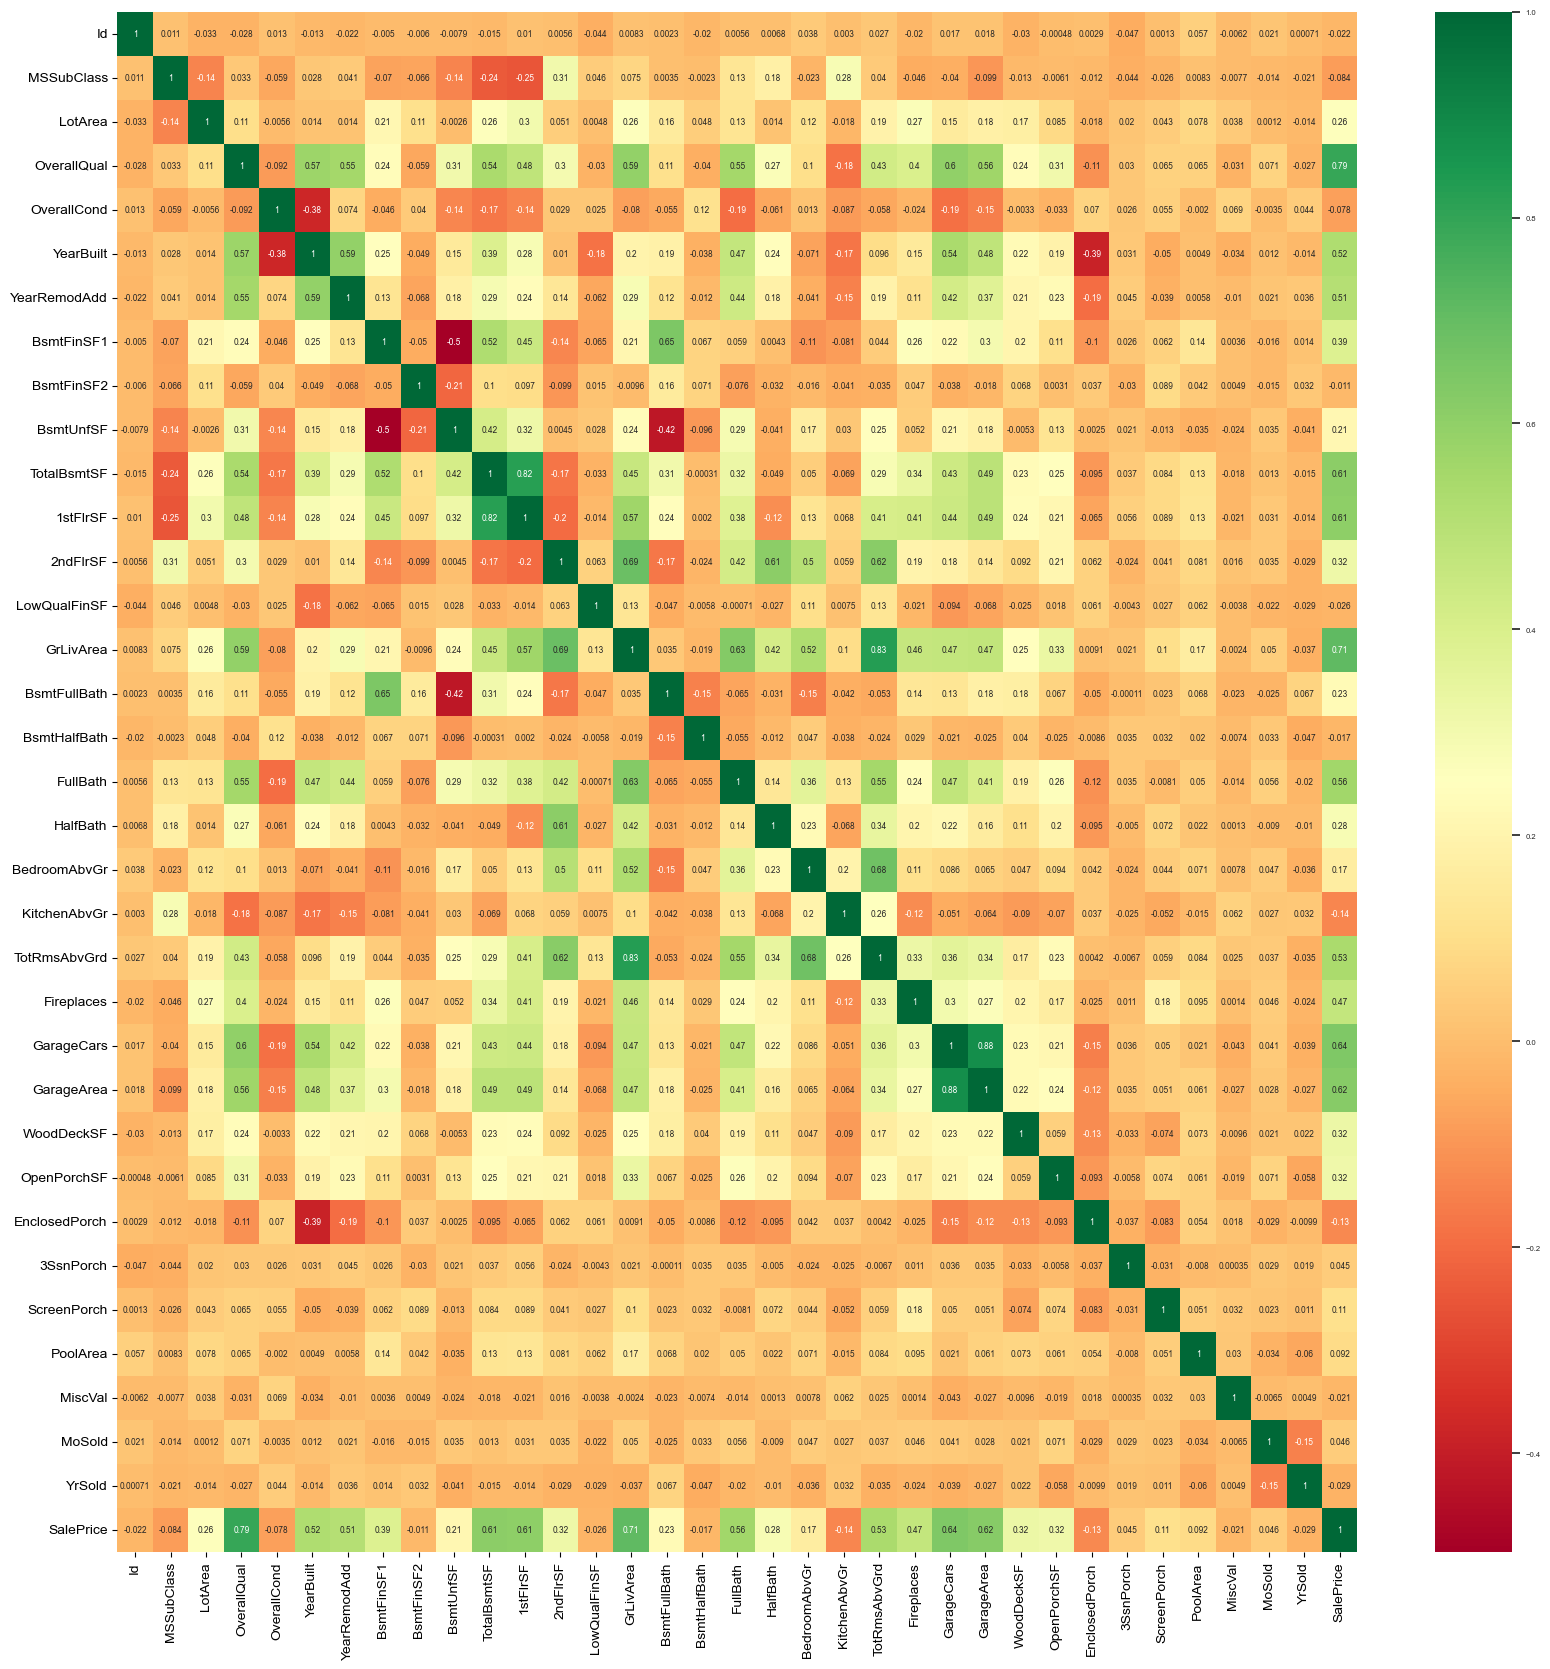

In [7]:
model_heatmap(housedf)

In [8]:
# Regression of the dataframe with non-numerical values dropped.
do_regression(housedf, 'SalePrice', size=0.05, random=234, to_print=True, print_time=True, sample=0.5)

(1387, 34)
(73, 34)
(1387,)
(73,)
Mean Absolute Error:	22105.97
The model explains:	87.948% variance of the target w.r.t features is
The RSquare score of the model is:	0.88
Coefficients:tId                  -1.055531
MSSubClass        -161.590429
LotArea              0.366217
OverallQual      17937.223572
OverallCond       4510.879095
YearBuilt          353.690813
YearRemodAdd       106.841674
BsmtFinSF1          11.656266
BsmtFinSF2          -3.979380
BsmtUnfSF            1.578868
TotalBsmtSF          9.255754
1stFlrSF            18.766160
2ndFlrSF            18.365195
LowQualFinSF        -5.762923
GrLivArea           31.368433
BsmtFullBath      9670.439483
BsmtHalfBath      4010.271073
FullBath          3351.811365
HalfBath         -1362.116126
BedroomAbvGr    -10129.307632
KitchenAbvGr    -15132.415804
TotRmsAbvGrd      5332.218894
Fireplaces        3611.751204
GarageCars       11460.079146
GarageArea           0.965794
WoodDeckSF          25.711332
OpenPorchSF         -4.633632
Enc

87.948

In [9]:
# Here, we will begin converting the non-numerical data into numerical values that can be used for prediction, using the function from earlier

# Drop all NaNs, convert to a number, assign to a new designated dataframe, and then reset
housetext = housetext.dropna(axis=1, how = 'any')
housetext = to_num(housetext)
house_num = housetext
housetext = housetextreset

C:\Users\Academics\AppData\Local\Temp\ipykernel_35472\2718168369.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(row, num)


In [10]:
housetext.head(1)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
# Quick look at the dimensions, ensure they are intact. housetext should = (1460,27), house_num should = (1460,27), housedf should = (1460, 35)
print (housetext.shape)
print (house_num.shape)
print (housedf.shape)

(1460, 43)
(1460, 27)
(1460, 35)


In [12]:
# Concatenation into final dataframe with all columns. Non-numerical data is now numeric
houseall = pd.concat ([housedf, house_num], axis=1)
houseall.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,50,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,60,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,50,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1
9,10,190,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
# Regression prediction dataframe. You can see the prices near the penultimate right and the prediction prices to the right of that.
regression_prediction_comparison(houseall, 'SalePrice', size=0.05, random=234, repeats=1).head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,SalePrice,Predicted Price
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,208500,64040.895667
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181500,259139.625332
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223500,192564.486726
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,140000,212414.918362
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250000,130132.340359
5,6,50,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143000,153496.697926
6,7,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,307000,269936.340879
7,8,60,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200000,295910.078894
8,9,50,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,129900,117898.178215
9,10,190,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,118000,269224.858672


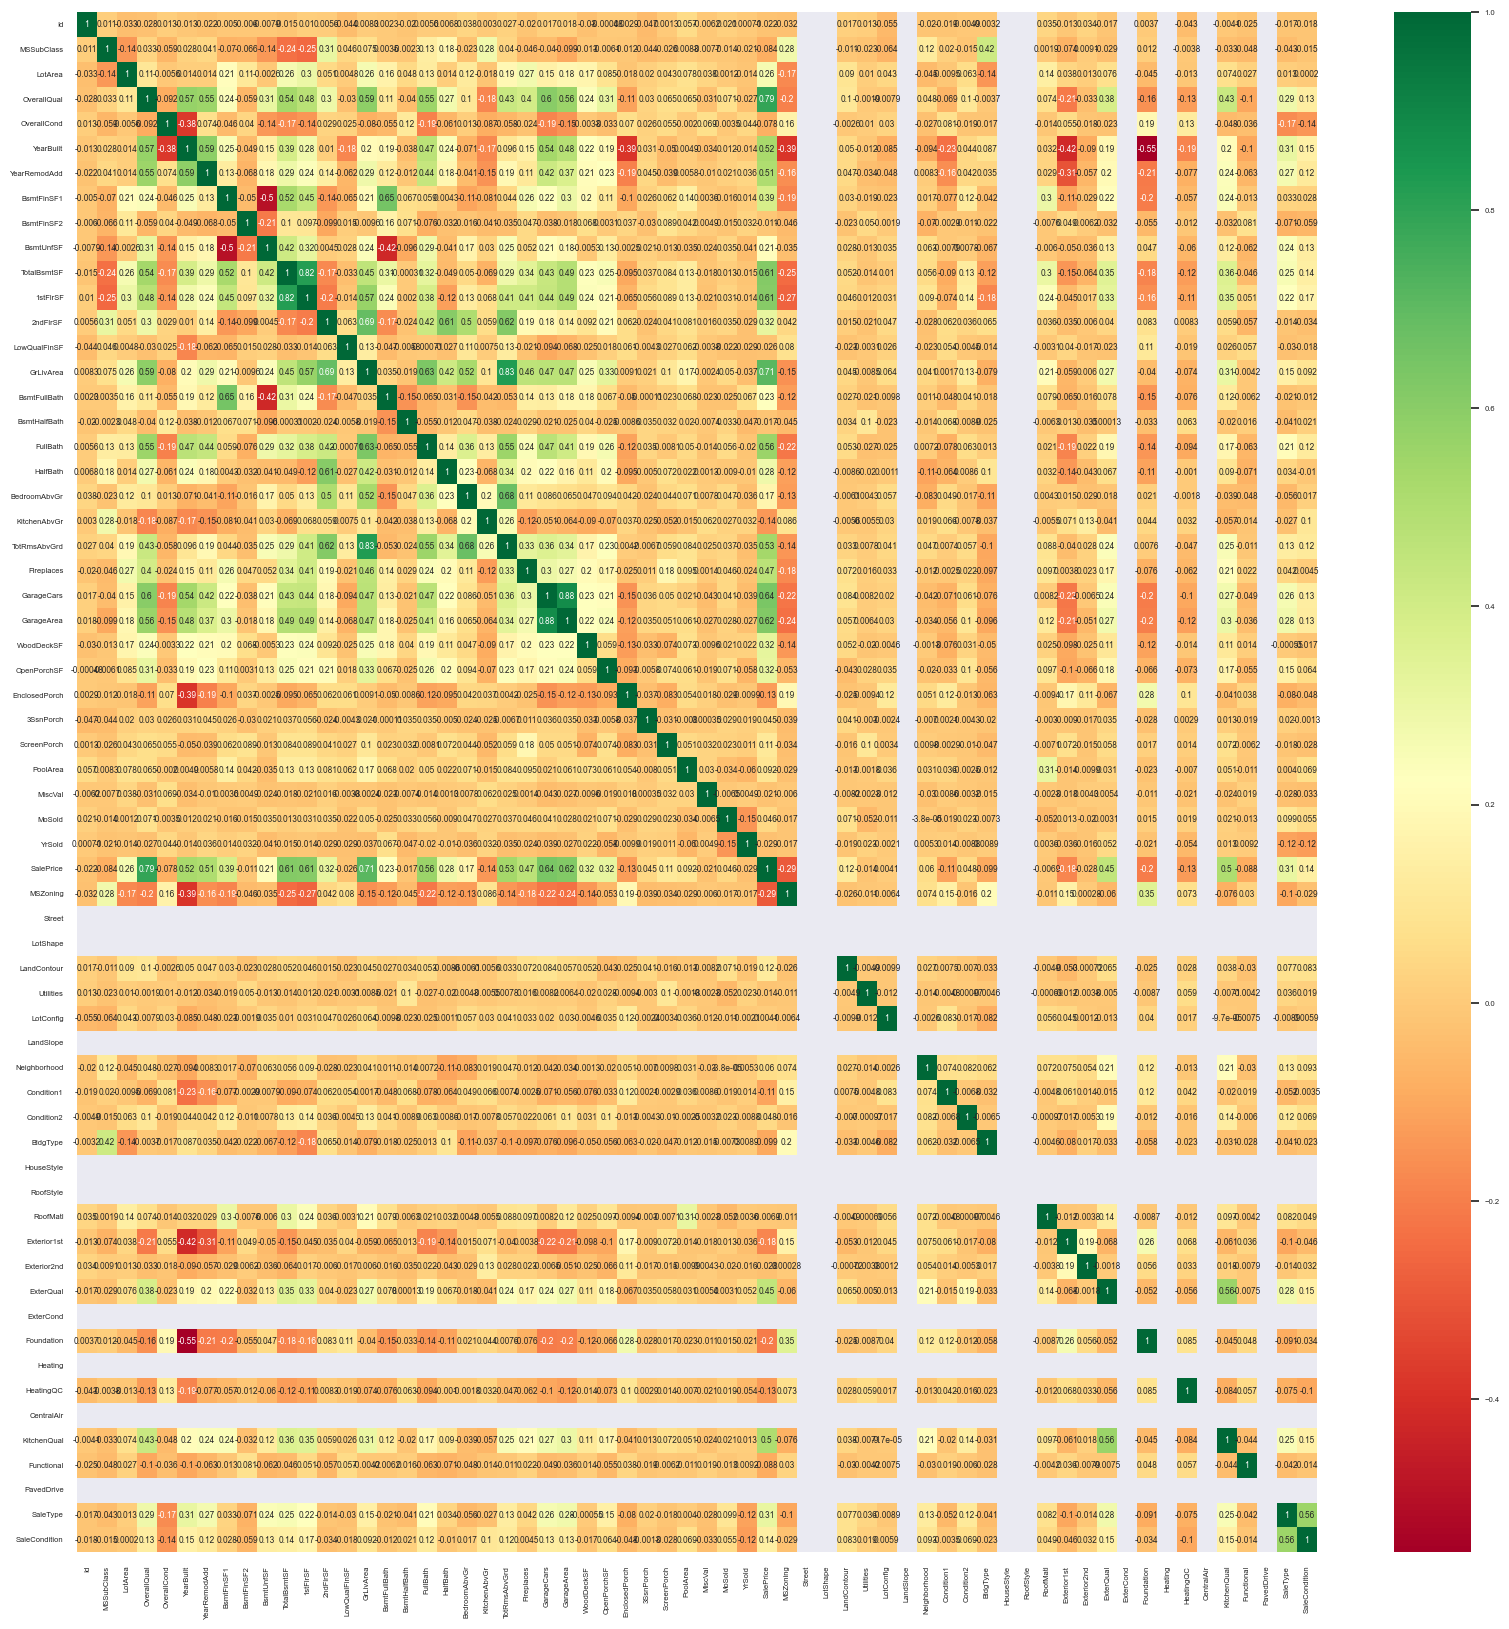

In [14]:
# Heatmap for the entire dataframe including the converted non-numeric data
model_heatmap(houseall)

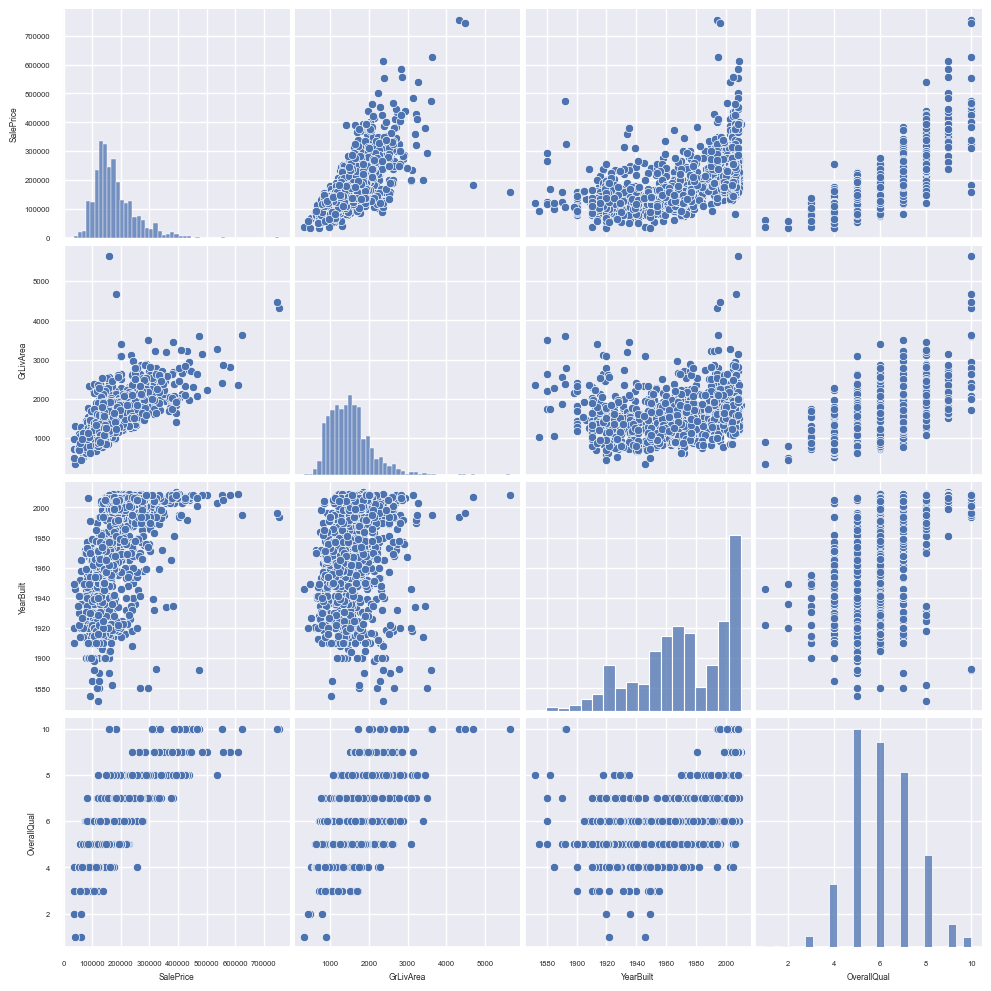

In [15]:
# Scatterplot horizontally, histplot diagonally.
model_pairplot(houseall, ['SalePrice', 'GrLivArea', 'YearBuilt', 'OverallQual'])

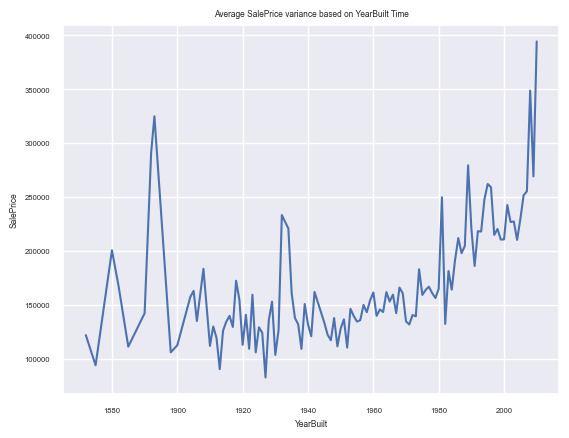

In [16]:
# Variance overtime of house prices with years.
model_overtime(houseall, 'YearBuilt', 'SalePrice')

In [17]:
# Regression on the new full dataframe. Note the percentage improvement.
do_regression(houseall, 'SalePrice', size=0.05, random=234) #969 works, 234 works, etc

(1387, 61)
(73, 61)
(1387,)
(73,)
Mean Absolute Error:	19780.93
The model explains:	89.582% variance of the target w.r.t features is
The RSquare score of the model is:	0.9
Coefficients:tId              -3.348306e-02
MSSubClass      -1.153305e+02
LotArea          4.894541e-01
OverallQual      1.193157e+04
OverallCond      5.179499e+03
YearBuilt        3.794718e+02
YearRemodAdd     1.002802e+02
BsmtFinSF1       2.116114e+01
BsmtFinSF2      -5.088438e-01
BsmtUnfSF       -5.876830e-01
TotalBsmtSF      2.006462e+01
1stFlrSF         2.207746e+01
2ndFlrSF         3.185011e+01
LowQualFinSF    -1.287516e+01
GrLivArea        4.105241e+01
BsmtFullBath     1.524256e+03
BsmtHalfBath    -1.321487e+03
FullBath        -5.356022e+02
HalfBath        -3.325502e+03
BedroomAbvGr    -7.607559e+03
KitchenAbvGr    -1.229165e+04
TotRmsAbvGrd     2.085585e+02
Fireplaces       2.553229e+03
GarageCars       3.223771e+03
GarageArea       2.013977e+01
WoodDeckSF       1.709525e+01
OpenPorchSF     -3.891888e+00
Encl

89.582

In [18]:
# Accuracy for ORIGINAL dataframe WITHOUT non-numeric data
print_regression_accuracy (housedf, 'SalePrice', 0, 999, 0.05)

Overall accuracy for model with range 0 to 999 with sample size 0.05:	 76.818.
The highest accuracy value was 92.533 and the lowest accuracy value was -112.746.


In [19]:
# Accuracy for NEW dataframe WITH non-numeric data included AS NUMBERS
print_regression_accuracy (houseall, 'SalePrice', 0, 999, 0.05)

Overall accuracy for model with range 0 to 999 with sample size 0.05:	 77.42.
The highest accuracy value was 95.407 and the lowest accuracy value was -131.099.


In [20]:
# Average accuracy evaluated 5 x 16 times, for ORIGINAL dataframe WITHOUT non-numeric data
print_all_regression_averages (housedf, 'SalePrice', 0.05, 16, 16)

Average Regression Accuracy:	75.851%


In [21]:
# Average accuracy evaluated 5 x 16 times, for NEW dataframe WITH non-numeric data included AS NUMBERS
print_all_regression_averages (houseall, 'SalePrice', 0.05, 16, 16)

Average Regression Accuracy:	82.243%


In [22]:
# Highest and lowest regression accuracies (on NEW FULL dataframe)
regression_highest_lowest (houseall, 'SalePrice', 0, 999, 0.05)

[95.407, -131.099]

In [23]:
# Modelling the regression value findings
reg_array = regression_array(housedf, 'SalePrice', 0, 999, 0.05)

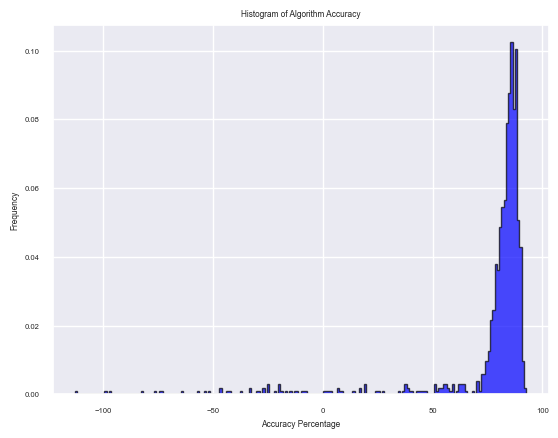

In [24]:
model_accuracy_histogram(reg_array)

# Model 2: Keras/Tensorflow

In [25]:
# Main original (nnumbers only)
housedf.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [26]:
# Edited dataframe with text values (as numbers) 
houseall.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Set random seet for TensorFlow
tf.random.set_seed(42)

# DF hold check
housedfreset = housedf
housedfreset.head(1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500


#### TensorFlow/Keras Model Functions

In [35]:
# Functions for Keras & Tensorflow model. Most of these have defaulted args to make calling easier.
def do_tensorflow(df, target, trainsize=0.2, random=999, epoch=50, batch_size_value=32, verbose_value=0, layer1=128, layer2=64, print_time=False, print_else=False):
    # Measure length it takes to execute
    start = time.time()

    # Target column
    y = df[target]
    
    # Predictive Variable Columns
    X = df.drop(columns=[target])

    # Quick preprocessing
    X = X.dropna(axis=1, how='any')
    X = pd.get_dummies(X)
    
    # Minmax scaler for accuracy points
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    # Split data into train & test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=trainsize, random_state=random)

    # Generate Sequential model and add layers
    model = Sequential([Input(shape=(X_train.shape[1],))])
    model.add(Dense(layer1, activation='relu'))
    model.add(Dense(layer2, activation='relu'))
    model.add(Dense(32, activation='relu')) #layer3
    model.add(Dense(16, activation='relu')) #layer4
    model.add(Dense(1))

    # Compile
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Fit model and test predictions
    history = model.fit(X_train, y_train, validation_split=trainsize, epochs=epoch, batch_size=batch_size_value, verbose=verbose_value)
    test_loss, test_mae = model.evaluate(X_test, y_test)
    
    # (Optional) Print evaluation metrics, otherwise just calculate them and return
    if print_else:
        print(f'Overall Loss (test):\t{test_loss}\nMean Absolute Error (Test):\t{test_mae}')    

    # Prediction
    y_pred = model.predict(X_test)
    if print_else:
        print(f'Prediction:\t{y_pred[:10]}')
        
    # r2 score
    r2 = r2_score(y_test, y_pred)
    # explained variance score. This is what will be returned.
    explained = mt.explained_variance_score(y_test,y_pred)

    # (Optional) Print the evaluation metrics
    if print_else:
        print(f'R^2 on test set:\t{r2}')
        print(f'Explained Variance Score /100:\t{np.round(explained*100,3)}%')

    # (Optional) Print compilation time
    if print_time:
        print(f'Compiled in:\t{np.round(time.time() - start, 3)} seconds.')
        
    # Return
    return np.round(explained*100,3)

# Same as above, but returns a dataframe where both the predicted and actual values, along with their corresponding variables, can be viewed
def tensorflow_prediction_comparison(df, target, trainsize=0.2, random=999, epoch=50, batch_size_value=32, verbose_value=0, layer1=128, layer2=64):
    # Target column
    y = df[target]

    # Predictive Variable Columns
    X = df.drop(columns=[target])

    # Quick preprocessing
    X = X.dropna(axis=1, how='any')
    X = pd.get_dummies(X)

    # Minmax scaler for accuracy points
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Split data into train & test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=trainsize, random_state=random)

    # Generate Sequential model and add layers
    model = Sequential([Input(shape=(X_train.shape[1],))])
    model.add(Dense(layer1, activation='relu'))
    model.add(Dense(layer2, activation='relu'))
    model.add(Dense(32, activation='relu')) #layer3
    model.add(Dense(16, activation='relu')) #layer4
    model.add(Dense(1))
    
    # Compile
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Fit model and test predictions
    history = model.fit(X_train, y_train, validation_split=trainsize, epochs=epoch, batch_size=batch_size_value, verbose=verbose_value)
    test_loss, test_mae = model.evaluate(X_test, y_test)

    # Prediction
    y_pred = model.predict(X_test)

    # Concatenate existing and predicted into a dataframe
    xdf = pd.DataFrame(X)
    ydf = pd.DataFrame(y)
    y_predictdf = pd.DataFrame(y_pred, columns=['Predicted Price'])

    # Return
    return pd.concat([xdf, ydf, y_predictdf], axis=1)
    
# Return accuracy overall
def tensorflow_accuracy_array(df, target, repeats=8, trainsize=0.2, epoch=50, batch_size_value=32, layer1=128, layer2=64):
    # Initialise an accuracy array
    accuracy_arr = []

    # Random list of values in range (0,999). Model will be run with these as the random state
    rand_acc = random_list (repeats, 0, 999)
    
    # Run model with random states and append accuracy results to the array
    for i in rand_acc:
        acc = (do_tensorflow(df, target, trainsize, i, epoch, batch_size_value, 0, layer1, layer2, False))
        accuracy_arr.append (acc)
    return accuracy_arr

# Accuracy average across multiple runs
def tensorflow_accuracy_average(df, target, repeats=8, trainsize=0.2, epoch=50, batch_size_value=32, layer1=128, layer2=64):
    accuracy_arr = tensorflow_accuracy_array(df, target, repeats, trainsize, epoch, batch_size_value, layer1, layer2)
    return np.round(sum(accuracy_arr)/len(accuracy_arr), 3)

# Print accuracy averages nicely
def print_tensorflow_accuracy_average(df, target, repeats=8, trainsize=0.2, epoch=50, batch_size_value=32, layer1=128, layer2=64):
    average = tensorflow_accuracy_average(df, target, repeats, trainsize, epoch, batch_size_value, layer1, layer2)
    print(f'Average Tensorflow Accuracy:\t{np.round(average, 3)}%')

# Highest and lowest accuracy values
def tensorflow_highest_lowest(df, target, repeats=8, trainsize=0.2, epoch=50, batch_size_value=32, layer1=128, layer2=64):
    # Initialise array
    tens_array = tensorflow_accuracy_array(df, target, repeats, trainsize, epoch, batch_size_value, layer1, layer2)
    
    # Initialize maximum and minimum to extreme boundary values
    maximum = float('-1000')  # Smallest possible value
    minimum = float('1000')   # Largest possible value
    
    # Loop through the tensorflow array and find min and max values
    for tens_value in tens_array:
        if tens_value > maximum:
            maximum = tens_value
        if tens_value < minimum:
            minimum = tens_value

    # Min and max values returned as array
    return [maximum, minimum]

#### Running the Keras/Tensorflow model

In [29]:
# First tensorflow run, on ORIGINAL dataframe WITHOUT non-numeric data
do_tensorflow(df=housedf, target='SalePrice', trainsize=0.2, random=999, epoch=50, batch_size_value=64, verbose_value=0, layer1=128, layer2=64, print_time=True)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1894438400.0000 - mae: 31786.0605 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Compiled in:	8.632 seconds.


64.904

In [30]:
# Second tensorflow run, for NEW dataframe WITH non-numeric data included AS NUMBERS. 
# Args are also optimised here
do_tensorflow(df=houseall, target='SalePrice', trainsize=0.05, random=999, epoch=350, batch_size_value=32, verbose_value=0, layer1=128, layer2=64, print_time=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 325429216.0000 - mae: 12969.1621 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Compiled in:	55.385 seconds.


93.923

In [31]:
# Example accuracy array
tensorflow_accuracy_array(housedf, 'SalePrice', repeats=8, trainsize=0.05, epoch=350, batch_size_value=32, layer1=128, layer2=64)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 655010688.0000 - mae: 16649.0527 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/stepWARNING:tensorflow:6 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D210F38900> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 915434944.0000 - mae: 18281.6836
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/

[90.67, 86.386, 89.036, 83.522, 88.782, 90.547, -61.416, 86.151]

In [32]:
# Accuracy average across 10 runs, for ORIGINAL dataframe WITHOUT non-numeric data
tensorflow_accuracy_average(housedf, 'SalePrice', repeats=10, trainsize=0.05, epoch=350, batch_size_value=32, layer1=128, layer2=64)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 733212032.0000 - mae: 17152.3184 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2740957952.0000 - mae: 23585.5938
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 538262592.0000 - mae: 17920.4199
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 725564800.0000 - mae: 19449.0312
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1196007936.0000 - mae: 20223.1250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1397354752.0000 - mae: 22645.9961
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1532342656.0000 - mae: 20120.3496
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 530424960.0000 - mae: 16732.4023
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 567746496.0000

84.304

In [33]:
# New tensorflow average accuracy run, for NEW dataframe WITH non-numeric data included AS NUMBERS. (10 repeats)
print_tensorflow_accuracy_average(houseall, 'SalePrice', repeats=10, trainsize=0.05, epoch=350, batch_size_value=32, layer1=128, layer2=64)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 880397696.0000 - mae: 20039.3086  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 394185984.0000 - mae: 13813.6377 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3494993408.0000 - mae: 22217.9531
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 407384576.0000 - mae: 14908.8350 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 672961408.0000 - mae: 15775.5645
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 798538944.0000 - mae: 19002.1270 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 227896096.0000 - mae: 11004.9141
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 258322640.0000 - mae: 12561.7285
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 314659648.0000 -

# 

In [36]:
# Highest and lowest accuracy assuming all args are optimal
tensorflow_highest_lowest(houseall, 'SalePrice', repeats=10, trainsize=0.05, epoch=350, batch_size_value=32, layer1=128, layer2=64)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 498448032.0000 - mae: 15892.8887 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9755753472.0000 - mae: 28533.7754
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 471055520.0000 - mae: 15759.3613
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 967193984.0000 - mae: 18680.1172 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1537872896.0000 - mae: 21787.6426
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 593008768.0000 - mae: 16068.8203 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 457003616.0000 - mae: 15322.5918
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13503913984.0000 - mae: 29419.3398
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 308207744.000

[94.531, -144.893]

In [37]:
# Prediction vs reality for this model. Returns a mostly unlabelled dataframe but the right-most columns are labelled correctly again.
tensorflow_prediction_comparison(df=houseall, target='SalePrice', trainsize=0.05, random=999, epoch=350, batch_size_value=32, verbose_value=0, layer1=128, layer2=64).head(10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 335325696.0000 - mae: 13156.0527
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,SalePrice,Predicted Price
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.00000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.386460,0.000000,0.111517,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500,124964.734375
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.00000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.324401,0.347725,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.363636,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181500,148090.656250
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.00000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.428773,0.000000,0.076782,0.000000,0.000000,0.0,0.0,0.000000,0.727273,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500,232050.484375
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.00000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.452750,0.000000,0.063985,0.492754,0.000000,0.0,0.0,0.000000,0.090909,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2,140000,131263.406250
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.00000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.589563,0.224037,0.153565,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000,124385.234375
5,0.003427,0.176471,0.059899,0.444444,0.500,0.876812,0.750000,0.129695,0.00000,0.027397,0.130278,0.106012,0.274092,0.0,0.193670,0.333333,0.0,0.333333,0.5,0.125,0.333333,0.250000,0.000000,0.50,0.338505,0.046674,0.054845,0.000000,0.629921,0.0,0.0,0.045161,0.818182,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143000,108473.921875
6,0.004112,0.000000,0.041057,0.777778,0.500,0.956522,0.916667,0.242558,0.00000,0.135702,0.275941,0.312070,0.000000,0.0,0.256217,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.333333,0.50,0.448519,0.297550,0.104205,0.000000,0.000000,0.0,0.0,0.000000,0.636364,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307000,146272.078125
7,0.004798,0.235294,0.042450,0.666667,0.625,0.731884,0.383333,0.152197,0.02171,0.092466,0.181178,0.177375,0.476029,0.0,0.330821,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.666667,0.50,0.341326,0.274212,0.372943,0.413043,0.000000,0.0,0.0,0.022581,0.909091,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200000,69155.578125
8,0.005483,0.176471,0.022529,0.666667,0.500,0.427536,0.000000,0.000000,0.00000,0.407534,0.155810,0.157871,0.364165,0.0,0.271289,0.000000,0.0,0.666667,0.0,0.250,0.666667,0.500000,0.666667,0.50,0.330042,0.105018,0.000000,0.371377,0.000000,0.0,0.0,0.000000,0.272727,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.2,129900,174424.359375
9,0.006169,1.000000,0.028605,0.444444,0.625,0.485507,0.000000,0.150780,0.00000,0.059932,0.162193,0.170491,0.000000,0.0,0.139977,0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 387953760.0000 - mae: 14459.9014
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 968556032.0000 - mae: 18837.7441 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 763723008.0000 - mae: 16137.8232
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 576436736.0000 - mae: 15092.1211
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2470260480.0000 - mae: 23037.1465
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 499019072.0000 - mae: 14442.6680
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1376265984.0000 - mae: 17844.8164
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 432833088.0000 - mae: 15845.8750
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


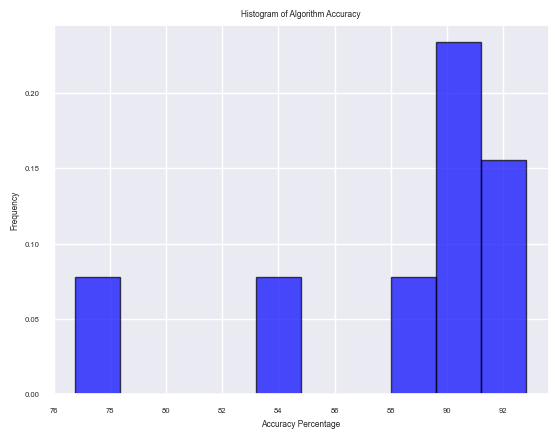

In [38]:
# Model accuracies on a bar diagram
tens_array =  tensorflow_accuracy_array(houseall, 'SalePrice', repeats=8, trainsize=0.05, epoch=350, batch_size_value=32, layer1=128, layer2=64)
model_accuracy_histogram(tens_array, bins_val=10, density_val=100, histtype_val='barstacked')